<a href="https://colab.research.google.com/github/shiyasAli/Netflix-movies-and-TV-shows-clustering/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
from nltk.corpus.reader import wordnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/Colab Notebooks/Almabetter/unsupervised capstone/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df['country'].unique()

In [4]:
def string_to_list(text):
  slist=text.split(',')
  for index in range(len(slist)):
    slist[index]=slist[index].strip()
  return slist

In [ ]:
df[df['release_year']<2000]['show_id'].count()

449

In [ ]:
df['country'][1001]

['United States', 'France']

In [ ]:
release_year_df=df.groupby('release_year')['show_id'].count().reset_index()
plt.plot('release_year','show_id',data=release_year_df)

([<matplotlib.axis.XTick at 0x7f1d868ed5d0>,
 <a list of 22 Text major ticklabel objects>)

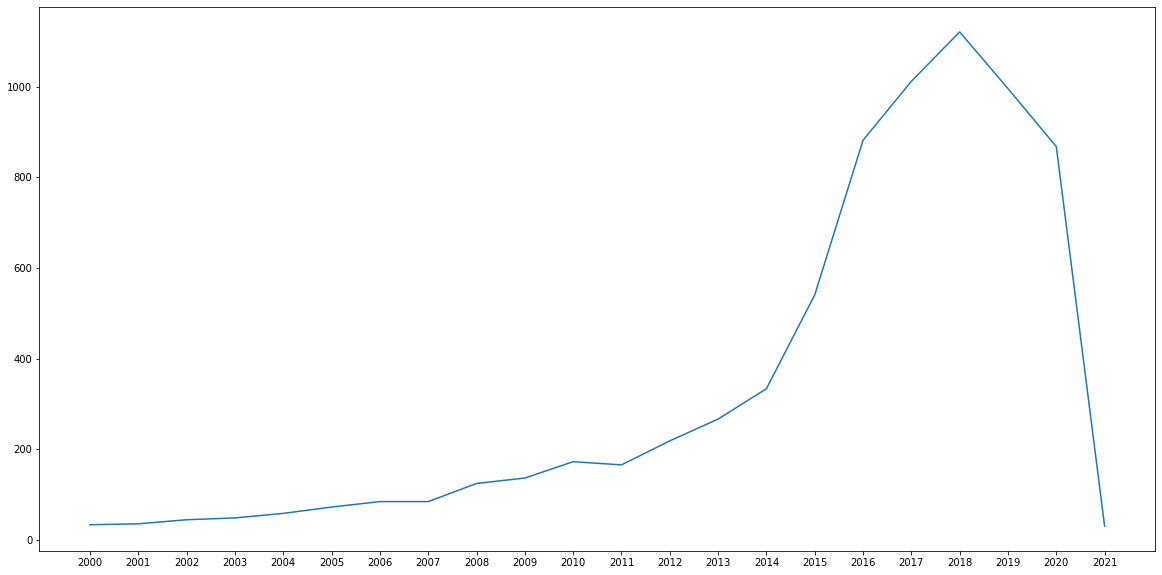

In [ ]:
df_above_2000=df[df['release_year']>=2000]
release_year_df=df_above_2000.groupby('release_year')['show_id'].count().reset_index()
year=release_year_df['release_year'].values
plt.figure(figsize=(20,10))
plt.plot('release_year','show_id',data=release_year_df)
plt.xticks(year)

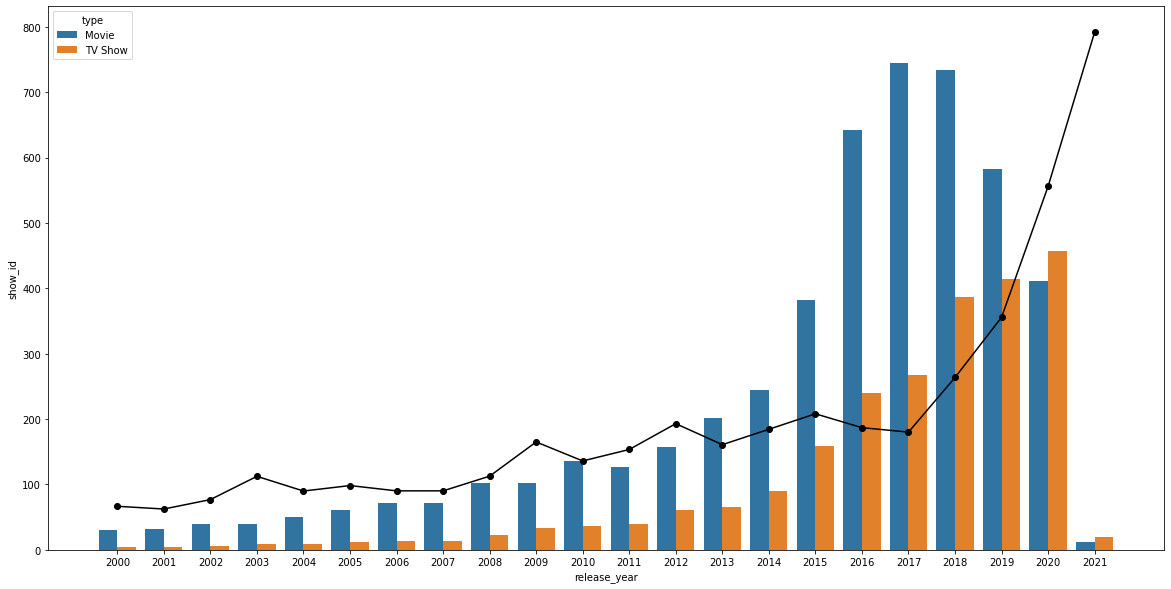

In [38]:
release_year_type_df=df_above_2000.groupby(['release_year','type'])['show_id'].count().reset_index()
tv_movie_ratio=(release_year_type_df[release_year_type_df['type']!='Movie']['show_id'].values/release_year_type_df[release_year_type_df['type']=='Movie']['show_id'].values)*500
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.barplot(x='release_year',y='show_id',hue='type',data=release_year_type_df)
plt.plot(tv_movie_ratio,color='black',marker='o')

In [ ]:
tv_movie_ratio=release_year_type_df[release_year_type_df['type']!='Movie']['show_id'].values/release_year_type_df[release_year_type_df['type']=='Movie']['show_id'].values
tv_movie_ratio

array([0.13333333, 0.125     , 0.15384615, 0.225     , 0.18      ,
       0.19672131, 0.18055556, 0.18055556, 0.2254902 , 0.33009709,
       0.27205882, 0.30708661, 0.38607595, 0.32178218, 0.36885246,
       0.41623037, 0.37383178, 0.36021505, 0.52724796, 0.71134021,
       1.11192214, 1.58333333])

In [ ]:
release_year_type_df[release_year_type_df['type']!='Movie']['show_id']

1       4
3       4
5       6
7       9
9       9
11     12
13     13
15     13
17     23
19     34
21     37
23     39
25     61
27     65
29     90
31    159
33    240
35    268
37    387
39    414
41    457
43     19
Name: show_id, dtype: int64

In [13]:
country_df=df.copy()
country_df.dropna(axis=0,subset=['country'],inplace=True)
country_df['country']=country_df['country'].apply(string_to_list)
country_df['listed_in']=country_df['listed_in'].apply(string_to_list)
country_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

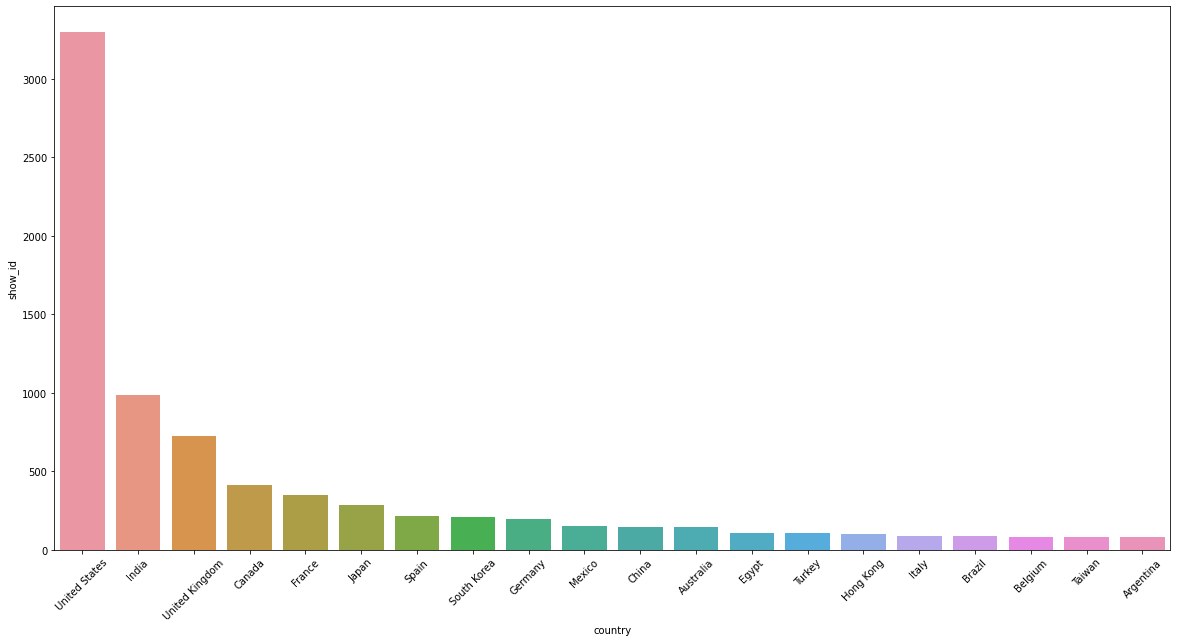

In [22]:
country_df_1=country_df.explode('country',ignore_index=True).groupby('country')['show_id'].count().reset_index().sort_values('show_id',ascending=False,ignore_index=True)
top_20_country_df=country_df_1[0:20]
plt.figure(figsize=(20,10))
sns.barplot('country','show_id',data=top_20_country_df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

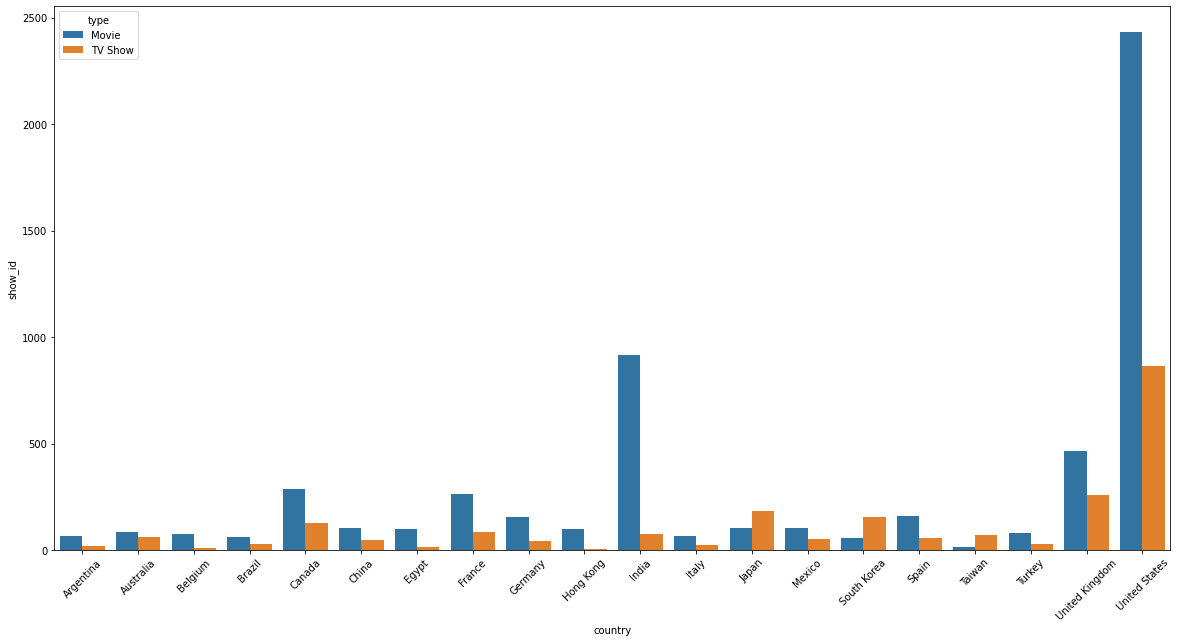

In [28]:
country_df_2=country_df.explode('country',ignore_index=True)
country_df_2_bool=country_df_2['country'].apply(lambda x :x in top_20_country_df['country'].values)
plt.figure(figsize=(20,10))
sns.barplot(x='country',y='show_id',hue='type',data=country_df_2[country_df_2_bool].groupby(['country','type'])['show_id'].count().reset_index())
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

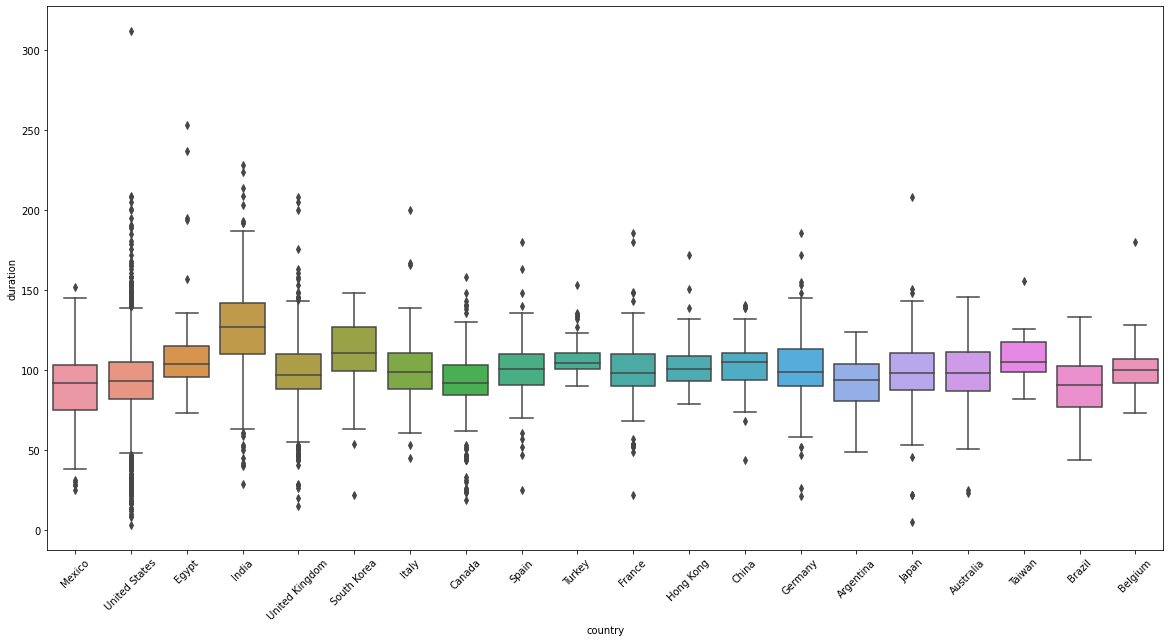

In [43]:
country_duration_df=country_df_2[country_df_2_bool][country_df_2[country_df_2_bool]['type']=='Movie']
def duration_converter(text):
  text=text[:-4]
  return int(text)
country_duration_df['duration']=country_duration_df['duration'].apply(duration_converter)
plt.figure(figsize=(20,10))
sns.boxplot(x='country',y='duration',data=country_duration_df)
plt.xticks(rotation=45)

In [18]:
cluster_df=df.copy()[['show_id','title','description']]
cluster_df.head()

,show_id,title,description
0,s1,3%,In a future where the elite inhabit an island ...
1,s2,7:19,After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"When an army recruit is found dead, his fellow..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,A brilliant group of students become card-coun...


In [28]:
cluster_df['length']=cluster_df['description'].apply(lambda x: len(x))
cluster_df.head()

,show_id,title,description,length
0,s1,3%,future elite inhabit island paradise far crowd...,86
1,s2,7:19,devastate earthquake hit Mexico City trap surv...,99
2,s3,23:59,army recruit found dead fellow soldier force c...,108
3,s4,9,postapocalyptic world ragdoll robot hide fear ...,101
4,s5,21,brilliant group student become cardcounting ex...,105


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


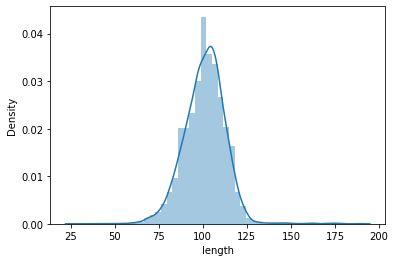

In [29]:
sns.distplot(cluster_df['length'])

In [30]:
def remove_punctuation(text):
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
cluster_df['description']=cluster_df['description'].apply(remove_punctuation)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,future elite inhabit island paradise far crowd...,86
1,s2,7:19,devastate earthquake hit Mexico City trap surv...,99
2,s3,23:59,army recruit found dead fellow soldier force c...,108
3,s4,9,postapocalyptic world ragdoll robot hide fear ...,101
4,s5,21,brilliant group student become cardcounting ex...,105


In [31]:
def lemmatizer(text):
  tokens=word_tokenize(text)
  def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
  lem=WordNetLemmatizer()
  text=' '.join([lem.lemmatize(w,get_wordnet_pos(w)) for w in tokens])
  return text
cluster_df['description']=cluster_df['description'].apply(lemmatizer)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,future elite inhabit island paradise far crowd...,86
1,s2,7:19,devastate earthquake hit Mexico City trap surv...,99
2,s3,23:59,army recruit found dead fellow soldier force c...,108
3,s4,9,postapocalyptic world ragdoll robot hide fear ...,101
4,s5,21,brilliant group student become cardcounting ex...,105


In [32]:
def stop_words_remover(text):
  stop_words=set(stopwords.words('english'))
  word_list=text.split()
  word_list=[word for word in word_list if word.lower() not in stop_words]
  text=' '.join(word_list)
  return(text)
cluster_df['description']=cluster_df['description'].apply(stop_words_remover)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,future elite inhabit island paradise far crowd...,86
1,s2,7:19,devastate earthquake hit Mexico City trap surv...,99
2,s3,23:59,army recruit found dead fellow soldier force c...,108
3,s4,9,postapocalyptic world ragdoll robot hide fear ...,101
4,s5,21,brilliant group student become cardcounting ex...,105


In [33]:
vectorizer=TfidfVectorizer(max_df=0.5,min_df=5,max_features=1000)
X=vectorizer.fit_transform(cluster_df['description'])
X.shape

(7787, 1000)

In [ ]:
vectorizer.get_feature_names_out()

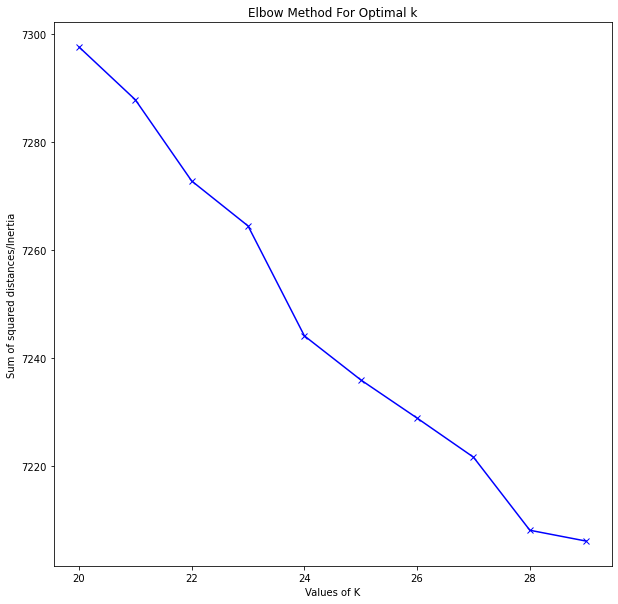

In [46]:
wss=[]
k=range(20,30)
for num_clusters in k:
  k_means=KMeans(n_clusters=num_clusters,random_state=42)
  k_means.fit(X)
  wss.append(k_means.inertia_)
plt.figure(figsize=(10,10))
plt.plot(k,wss,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

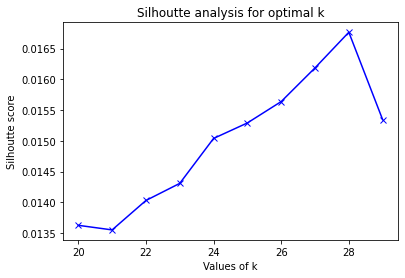

In [47]:
sil_score=[]
k=range(20,30)
for num_clusters in k:
  k_means=KMeans(n_clusters=num_clusters,random_state=42)
  k_means.fit(X)
  cluster_labels=k_means.labels_
  sil_score.append(silhouette_score(X,cluster_labels))
plt.plot(k,sil_score,'bx-')
plt.xlabel('Values of k')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte analysis for optimal k')
plt.show()

In [50]:
k_means=KMeans(n_clusters=28,random_state=42)
k_means.fit(X)
labels=k_means.labels_
print('Silhoutte score: {}\n'.format(silhouette_score(X,labels)))
print('Calinski Harabaz Index: {}\n'.format(calinski_harabasz_score(X.toarray(),labels)))
print('Davies Bouldin index: {}\n'.format(davies_bouldin_score(X.toarray(),labels)))

Silhoutte score: 0.016766370985903476

Calinski Harabaz Index: 18.719485499948714

Davies Bouldin index: 6.665105444780978

